[*********************100%***********************]  8 of 8 completed


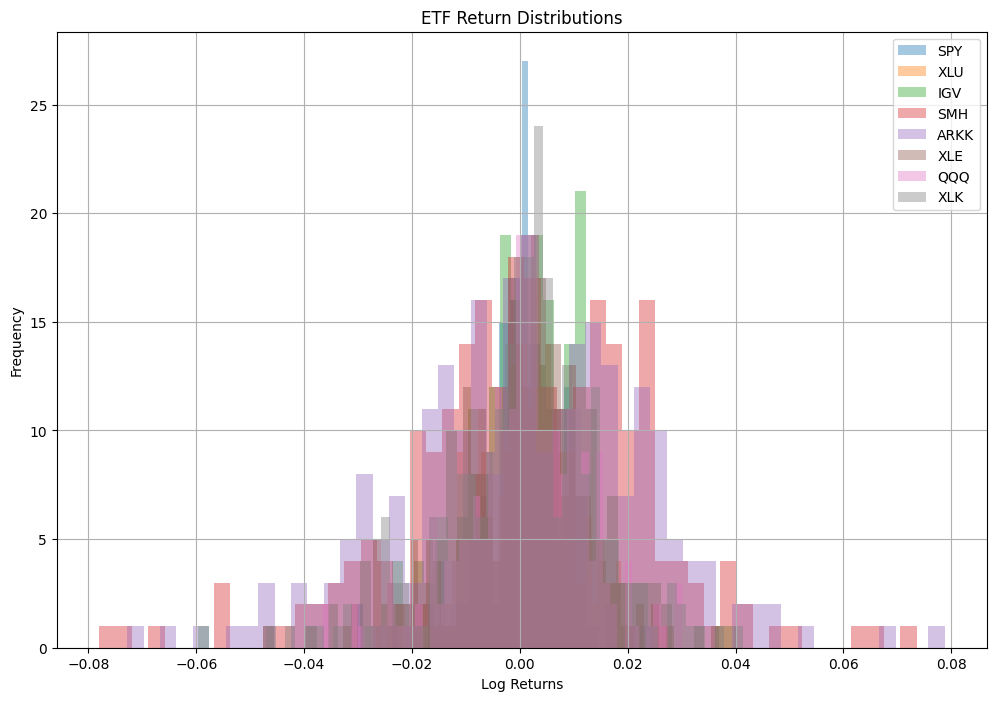

Ranking by Skewness (Right Tail Fatness):
        Skewness  Kurtosis
Ticker                    
ARKK   -0.133339  0.708394
XLU    -0.267217  0.231509
SMH    -0.343808  1.509385
XLE    -0.377170  0.587161
XLK    -0.417549  1.059156
QQQ    -0.468508  1.046070
SPY    -0.575605  1.881723
IGV    -0.654350  1.983656


In [18]:
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# List of ETFs
etfs = ["SPY", "XLU", "IGV", "SMH", "ARKK", "XLE", "QQQ", "XLK"]

# Download data for 2024 (Assuming data is available)
data = yf.download(etfs, start="2024-01-01", end="2025-1-1", auto_adjust=False)['Adj Close']

# Calculate log returns
log_returns = np.log(data / data.shift(1)).dropna()

# Skewness & Kurtosis
results = pd.DataFrame({
    'Skewness': log_returns.skew(),
    'Kurtosis': log_returns.kurtosis()
})

# Plot histograms for visual analysis
plt.figure(figsize=(12, 8))
for etf in etfs:
    plt.hist(log_returns[etf], bins=50, alpha=0.4, label=etf)
plt.title('ETF Return Distributions')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Rank ETFs by Skewness (Right Tail Heaviness)
results_sorted = results.sort_values(by='Skewness', ascending=False)
print("Ranking by Skewness (Right Tail Fatness):")
print(results_sorted)
